# Combined Oracle Bandits

Analyze the performance of various oracle bandits that solve the combined activity and matching task

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import json 
import argparse 
import sys
from openrl.envs.common import make
from gymnasium.envs.registration import register

In [3]:
from rmab.simulator import RMABSimulator
from rmab.baselines import optimal_whittle,  optimal_q_iteration, optimal_whittle_sufficient, optimal_neural_q_iteration
from rmab.fr_dynamics import get_all_transitions
from rmab.utils import get_save_path, delete_duplicate_results


/usr0/home/naveenr/miniconda3/envs/openrl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
is_jupyter = 'ipykernel' in sys.modules

In [23]:
if is_jupyter: 
    seed        = 42
    n_arms      = 4
    budget      = 3 
    discount    = 0.9
    alpha       = 3 
    n_episodes  = 30
    episode_len = 20 
    n_epochs    = 10
    save_name = 'combined_arms_{}'.format(n_arms)
    match_prob = 0.5
    save_with_date = False 
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--n_arms',         '-N', help='num beneficiaries (arms)', type=int, default=8)
    parser.add_argument('--episode_len',    '-H', help='episode length', type=int, default=20)
    parser.add_argument('--n_episodes',     '-T', help='num episodes', type=int, default=30)
    parser.add_argument('--budget',         '-B', help='budget', type=int, default=3)
    parser.add_argument('--n_epochs',       '-E', help='number of epochs (num_repeats)', type=int, default=10)
    parser.add_argument('--discount',       '-d', help='discount factor', type=float, default=0.9)
    parser.add_argument('--alpha',          '-a', help='alpha: for conf radius', type=float, default=3)
    parser.add_argument('--seed',           '-s', help='random seed', type=int, default=42)
    parser.add_argument('--save_name',      '-n', help='save name', type=str, default='combined_lamb')
    parser.add_argument('--match_prob',      '-m', help='match probability', type=float, default=0.5)
    parser.add_argument('--use_date', action='store_true')

    args = parser.parse_args()

    n_arms      = args.n_arms
    budget      = args.budget
    discount    = args.discount
    alpha       = args.alpha 
    seed        = args.seed
    n_episodes  = args.n_episodes
    episode_len = args.episode_len
    n_epochs    = args.n_epochs
    save_name   = args.save_name 
    save_with_date = args.use_date 
    match_prob = args.match_prob 



In [24]:
n_states = 2
n_actions = 2

In [25]:
all_population_size = 100 # number of random arms to generate
all_transitions = get_all_transitions(all_population_size)

In [26]:
all_transitions.shape

(100, 2, 2, 2)

In [27]:
all_features = np.arange(all_population_size)

In [28]:
np.random.seed(seed)
random.seed(seed)
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, episode_len, n_epochs, n_episodes, budget, number_states=n_states, reward_style='match',match_probability=match_prob)

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [83 53 70 45]
cohort [41 39 15 76]
cohort [79 72 62 94]
cohort [92 64 85 36]
cohort [ 7 38 78  2]
cohort [12 59 91 73]
cohort [48 64  7 37]
cohort [18 53 12 32]
cohort [69 64 53 61]
cohort [46 87 15 26]


In [11]:
import logging
logging.disable(logging.CRITICAL)

In [29]:
# if is_jupyter:
#      np.random.seed(seed)
#      random.seed(seed)
#      register(
#           id="Custom_Env/IdentityEnv", # Fill in the name of the custom environment, it can be freely modified
#           entry_point="rmab.simulator:RMABSimulatorOpenRL", # Fill in the filename and class name of the custom environment
#      )
#      simulator_rl = make(id="Custom_Env/IdentityEnv", agent_num=10,
#      all_population=all_population_size, all_features=all_features, all_transitions=all_transitions,
#                cohort_size=n_arms, episode_len=episode_len, n_instances=n_epochs, n_episodes=n_episodes, budget=budget, number_states=n_states, reward_style='combined',lamb=lamb,match_probability=match_prob)
#      simulator_rl.episode_len = episode_len
#      neural_reward, neural_active_rate = optimal_neural_q_iteration(simulator_rl, budget,match_prob, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
#      print(np.mean(neural_reward) + lamb*n_arms*neural_active_rate)

In [20]:
if is_jupyter:
    lamb = 1
    np.random.seed(seed)
    random.seed(seed)
    joint_combined_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    joint_combined_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)
    print(np.mean(joint_combined_reward) + lamb*n_arms*joint_combined_active_rate)

first state [0 1 1 1 1]
instance 0, ep 1, state [1 1 1 0 0]
instance 0, ep 2, state [0 1 1 1 0]
instance 0, ep 3, state [1 0 1 1 1]
instance 0, ep 4, state [0 0 0 1 0]
instance 0, ep 5, state [0 0 1 0 1]
instance 0, ep 6, state [1 0 1 1 0]
instance 0, ep 7, state [1 1 1 1 1]
instance 0, ep 8, state [0 0 0 0 0]
instance 0, ep 9, state [1 0 0 0 1]
instance 0, ep 10, state [0 1 0 0 0]
instance 0, ep 11, state [0 1 0 1 0]
instance 0, ep 12, state [0 0 0 1 0]
instance 0, ep 13, state [0 0 0 1 1]
instance 0, ep 14, state [0 1 0 1 0]
instance 0, ep 15, state [0 0 1 1 1]
instance 0, ep 16, state [0 1 1 0 0]
instance 0, ep 17, state [0 1 0 1 0]
instance 0, ep 18, state [1 1 0 1 1]
instance 0, ep 19, state [1 0 0 1 1]
instance 0, ep 20, state [0 0 1 0 1]
instance 0, ep 21, state [1 1 1 0 1]
instance 0, ep 22, state [1 0 0 1 1]
instance 0, ep 23, state [0 1 1 1 1]
instance 0, ep 24, state [0 0 1 1 1]
instance 0, ep 25, state [0 1 1 1 1]
instance 0, ep 26, state [1 1 0 1 1]
instance 0, ep 27, stat

In [35]:
if is_jupyter:
    lamb = 32/n_arms 

    np.random.seed(seed)
    random.seed(seed)
    sufficient_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    sufficient_active_rate = simulator.total_active/(sufficient_reward.size*n_arms)
    print(np.mean(sufficient_reward)+lamb*n_arms*sufficient_active_rate)
    print(np.mean(sufficient_reward),sufficient_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [16]:
if is_jupyter:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)
    print(np.mean(approximate_combined_reward) + lamb*n_arms*approximate_combined_active_rate)
    print(np.mean(approximate_combined_reward),approximate_combined_active_rate)

first state [0 1 1 1 1 1]
   state [0 1 1 1 1 1] state_WI [  2.23   3.62   3.7    2.65   3.4  -10.  ] sorted [2 1 4]
   state [0 0 1 0 1 0] state_WI [  2.23   3.26   3.7    3.77   3.4  -10.  ] sorted [3 2 4]
   state [1 0 1 1 1 0] state_WI [  2.54   3.26   3.7    2.65   3.4  -10.  ] sorted [2 4 1]
   state [1 0 1 1 1 0] state_WI [  2.54   3.26   3.7    2.65   3.4  -10.  ] sorted [2 4 1]
   state [1 0 0 1 1 0] state_WI [  2.54   3.26   3.41   2.65   3.4  -10.  ] sorted [2 4 1]
   state [0 0 1 1 0 0] state_WI [  2.23   3.26   3.7    2.65   2.82 -10.  ] sorted [2 1 4]
   state [1 0 1 1 1 1] state_WI [  2.54   3.26   3.7    2.65   3.4  -10.  ] sorted [2 4 1]
   state [1 1 1 0 1 1] state_WI [  2.54   3.62   3.7    3.77   3.4  -10.  ] sorted [3 2 1]
   state [1 1 1 1 0 1] state_WI [  2.54   3.62   3.7    2.65   2.82 -10.  ] sorted [2 1 4]
   state [1 1 1 1 0 1] state_WI [  2.54   3.62   3.7    2.65   2.82 -10.  ] sorted [2 1 4]
   state [1 1 1 1 0 0] state_WI [  2.54   3.62   3.7    2.65   2

In [17]:
lamb_list = [0,1,2,4,8,16,32,64] 
lamb_list = [i/n_arms for i in lamb_list]


In [30]:
approximate_match = []
approximate_active = []

sufficient_match = []
sufficient_active = []

neural_match = []
neural_active = []

In [31]:
for lamb in lamb_list:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)

    approximate_match.append(np.mean(approximate_combined_reward))
    approximate_active.append(approximate_combined_active_rate)

first state [0 1 1 1]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [1 1 1 1] state_WI [1. 1. 1. 1.] sorted [2 1 3]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 0 0] state_WI [1.   1.   0.54 0.52] sorted [1 0 2]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1

In [32]:
for lamb in lamb_list:
    np.random.seed(seed)
    random.seed(seed)
    sufficient_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    sufficient_active_rate = simulator.total_active/(sufficient_reward.size*n_arms)

    sufficient_match.append(np.mean(sufficient_reward))
    sufficient_active.append(sufficient_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [30]:
for lamb in lamb_list:
    np.random.seed(seed)
    random.seed(seed)
    register(
        id="Custom_Env/IdentityEnv", # Fill in the name of the custom environment, it can be freely modified
        entry_point="rmab.simulator:RMABSimulatorOpenRL", # Fill in the filename and class name of the custom environment
    )
    simulator_rl = make(id="Custom_Env/IdentityEnv", agent_num=n_arms,
    all_population=all_population_size, all_features=all_features, all_transitions=all_transitions,
            cohort_size=n_arms, episode_len=episode_len, n_instances=n_epochs, n_episodes=n_episodes, budget=budget, number_states=n_states, reward_style='combined',lamb=lamb,match_probability=match_prob)
    simulator_rl.episode_len = episode_len
    neural_reward, neural_active_rate = optimal_neural_q_iteration(simulator_rl, budget,match_prob, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)

    neural_match.append(np.mean(neural_reward))
    neural_active.append(neural_active_rate)

/usr0/home/naveenr/miniconda3/envs/openrl/lib/python3.8/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment Custom_Env/IdentityEnv already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr0/home/naveenr/miniconda3/envs/openrl/lib/python3.8/site-packages/gymnasium/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in (old) done step API which returns one bool instead of two.
  deprecation(
/usr0/home/naveenr/miniconda3/envs/openrl/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.has_auto_reset to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.has_auto_reset` for environment variables or `env.get_wrapper_attr('has_auto_reset')` that will search the reminding wrappers.
  logger.warn(
/usr0/home/naveenr/miniconda3/envs/openrl/lib/python3.8/site-packages/gymnasium/utils

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [83 53 70 45 44]
cohort [69 40 44 33 42]
cohort [ 3 79 75 42 72]
cohort [24 53  6 31 26]
cohort [14 94 69 81 63]
cohort [42 54 50 84 96]
cohort [26 74 15 37 45]
cohort [22 28 47 63 11]
cohort [90 17 15  2 69]
cohort [89  1 92 57 47]
first state [[[0. 1. 1. 1. 1.]]]
first state [[[0. 1. 1. 1. 1.]]]
first state [[[1. 0. 0. 1. 1.]]]
first state [[[0. 1. 1. 1. 0.]]]
first state [[[0. 1. 1. 0. 1.]]]
first state [[[0. 1. 1. 0. 1.]]]
first state [[[0. 0. 0. 0. 1.]]]
first state [[[0. 1. 0. 0. 0.]]]
first state [[[0. 1. 0. 1. 0.]]]
first state [[[0. 1. 1. 1. 1.]]]
acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good

In [31]:
data = {
    'whittle_match': approximate_match, 
    'whittle_active': approximate_active,
    'sufficient_match': sufficient_match, 
    'sufficient_active': sufficient_active,
    'neural_match': neural_match, 
    'neural_active': neural_active, 
    'parameters': 
        {'seed'      : seed,
        'n_arms'    : n_arms,
        'budget'    : budget,
        'discount'  : discount, 
        'alpha'     : alpha, 
        'n_episodes': n_episodes, 
        'episode_len': episode_len, 
        'n_epochs'  : n_epochs, 
        'match_prob': match_prob, 
        'lambda_list': lamb_list,} 
}

In [32]:
if n_arms <= 6:
    np.random.seed(seed)
    random.seed(seed)
    _ = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='activity')
    optimal_active_rate = simulator.total_active/(_.size*n_arms)

    np.random.seed(seed)
    random.seed(seed)
    optimal_match_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount)

    joint_match = []
    joint_active = []

    for lamb in lamb_list:
        np.random.seed(seed)
        random.seed(seed)
        joint_combined_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
        joint_combined_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)

        joint_match.append(np.mean(joint_combined_reward))
        joint_active.append(joint_combined_active_rate)
    
    data['joint_match'] = joint_match 
    data['joint_active'] = joint_active 
    data['optimal_match'] = np.mean(optimal_match_reward)
    data['optimal_active'] = optimal_active_rate

first state [0 1 1 1 1]
instance 0, ep 1, state [1 1 1 0 0]
instance 0, ep 2, state [0 1 1 1 0]
instance 0, ep 3, state [1 0 1 1 1]
instance 0, ep 4, state [0 0 0 1 0]
instance 0, ep 5, state [0 0 1 0 1]
instance 0, ep 6, state [1 0 1 1 0]
instance 0, ep 7, state [1 1 1 1 1]
instance 0, ep 8, state [0 0 0 0 0]
instance 0, ep 9, state [1 0 0 0 1]
instance 0, ep 10, state [0 1 0 0 0]
instance 0, ep 11, state [0 1 0 1 0]
instance 0, ep 12, state [0 0 0 1 0]
instance 0, ep 13, state [0 0 0 1 1]
instance 0, ep 14, state [0 1 0 1 0]
instance 0, ep 15, state [0 0 1 1 1]
instance 0, ep 16, state [0 1 1 0 0]
instance 0, ep 17, state [0 1 0 1 0]
instance 0, ep 18, state [1 1 0 1 1]
instance 0, ep 19, state [1 0 0 1 1]
instance 0, ep 20, state [0 0 1 0 1]
instance 0, ep 21, state [1 1 1 0 1]
instance 0, ep 22, state [1 0 0 1 1]
instance 0, ep 23, state [0 1 1 1 1]
instance 0, ep 24, state [0 0 1 1 1]
instance 0, ep 25, state [0 1 1 1 1]
instance 0, ep 26, state [1 1 0 1 1]
instance 0, ep 27, stat

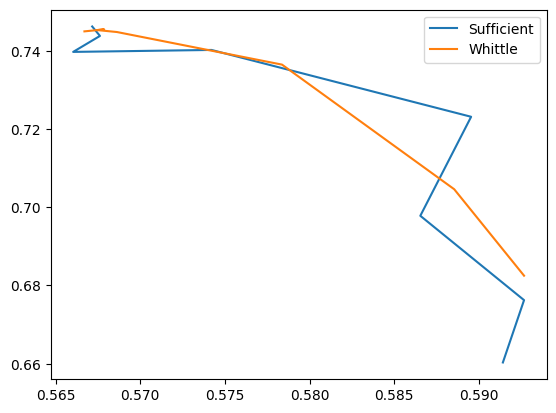

In [33]:
if is_jupyter:
    # plt.plot(joint_active,joint_match,label='Q Iteration')
    plt.plot(sufficient_active,sufficient_match,label='Sufficient')
    plt.plot(approximate_active,approximate_match,label='Whittle')
    # plt.plot(neural_match,neural_active,label='PPO')
    plt.legend()
    plt.show()

In [ ]:
save_path = get_save_path('combined',save_name,seed,use_date=save_with_date)

In [ ]:
delete_duplicate_results('combined',save_name,data)

In [ ]:
json.dump(data,open('../results/'+save_path,'w'))